In [1]:
%matplotlib inline

In [2]:
from rescale_dc2.rescale_snapshot import rescale_stellar_mass, rescale_ssfr

In [3]:
import os
dirname = "/Users/aphearin/Dropbox/protoDC2"

from astropy.table import Table

protoDC2_basename = "value_added_protoDC2_snapnum_487.hdf5"
protoDC2_z0 = Table.read(os.path.join(dirname, protoDC2_basename), path='data')

quenched_sequence_center = -13.5
ssfr = protoDC2_z0['totalStarFormationRate']/protoDC2_z0['totalMassStellar']
zero_mask = ssfr == 0.
nzeros = np.count_nonzero(zero_mask)
ssfr[zero_mask] = 10**np.random.normal(loc=quenched_sequence_center, scale=0.2, size=nzeros)
protoDC2_z0['ssfr'] = np.log10(ssfr)-9.

    
from rescale_dc2.load_catalogs import load_closest_available_umachine_catalog
umachine_z0 = load_closest_available_umachine_catalog(0.)


In [4]:
rescaled_mstar_dc2 = rescale_stellar_mass(protoDC2_z0, umachine_z0)

In [5]:
rescaled_ssfr_dc2 = rescale_ssfr(rescaled_mstar_dc2, umachine_z0)

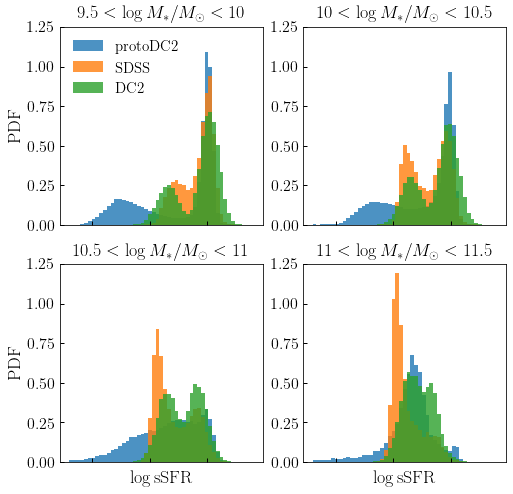

In [6]:
from rescale_dc2.load_catalogs import load_dc2_sdss
sdss = load_dc2_sdss()

from rescale_dc2.load_catalogs import sdss_completeness_redshift

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
(ax1, ax2), (ax3, ax4) = axes

ssfr_bins = np.linspace(-16, -8, 50)


#  Upper-left panel
low_sm, high_sm = 9.5, 10

sm_mask_pdc2 = protoDC2_z0['totalMassStellar'] >= 10**low_sm
sm_mask_pdc2 *= protoDC2_z0['totalMassStellar'] < 10**high_sm

sm_mask_dc2 = rescaled_ssfr_dc2['rescaled_mstar'] >= 10**low_sm
sm_mask_dc2 *= rescaled_ssfr_dc2['rescaled_mstar'] < 10**high_sm

sm_mask_sdss = sdss['sm'] >= low_sm
sm_mask_sdss *= sdss['sm'] < high_sm
sm_mask_sdss *= sdss['z'] < sdss_completeness_redshift(low_sm)

__=ax1.hist(protoDC2_z0['ssfr'][sm_mask_pdc2], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm protoDC2}$')
__=ax1.hist(sdss['ssfr'][sm_mask_sdss], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm SDSS}$')
__=ax1.hist(rescaled_ssfr_dc2['remapped_ssfr'][sm_mask_dc2], normed=True, alpha=0.8, bins=ssfr_bins, 
           label=r'${\rm DC2}$')
title1 = ax1.set_title(r'$9.5 < \log M_{\ast}/M_{\odot} < 10$')
__=ax1.xaxis.set_ticklabels('') 


# #  Upper-right panel
low_sm, high_sm = 10, 10.5
sm_mask_pdc2 = protoDC2_z0['totalMassStellar'] >= 10**low_sm
sm_mask_pdc2 *= protoDC2_z0['totalMassStellar'] < 10**high_sm

sm_mask_dc2 = rescaled_ssfr_dc2['rescaled_mstar'] >= 10**low_sm
sm_mask_dc2 *= rescaled_ssfr_dc2['rescaled_mstar'] < 10**high_sm

sm_mask_sdss = sdss['sm'] >= low_sm
sm_mask_sdss *= sdss['sm'] < high_sm
sm_mask_sdss *= sdss['z'] < sdss_completeness_redshift(low_sm)

__=ax2.hist(protoDC2_z0['ssfr'][sm_mask_pdc2], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm protoDC2}$')
__=ax2.hist(sdss['ssfr'][sm_mask_sdss], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm SDSS}$')
__=ax2.hist(rescaled_ssfr_dc2['remapped_ssfr'][sm_mask_dc2], normed=True, alpha=0.8, bins=ssfr_bins, 
           label=r'${\rm DC2}$')
title2 = ax2.set_title(r'$10 < \log M_{\ast}/M_{\odot} < 10.5$')
__=ax2.xaxis.set_ticklabels('') 

# #  lower-left panel
low_sm, high_sm = 10.5, 11
sm_mask_pdc2 = protoDC2_z0['totalMassStellar'] >= 10**low_sm
sm_mask_pdc2 *= protoDC2_z0['totalMassStellar'] < 10**high_sm

sm_mask_dc2 = rescaled_ssfr_dc2['rescaled_mstar'] >= 10**low_sm
sm_mask_dc2 *= rescaled_ssfr_dc2['rescaled_mstar'] < 10**high_sm

sm_mask_sdss = sdss['sm'] >= low_sm
sm_mask_sdss *= sdss['sm'] < high_sm
sm_mask_sdss *= sdss['z'] < sdss_completeness_redshift(low_sm)

__=ax3.hist(protoDC2_z0['ssfr'][sm_mask_pdc2], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm protoDC2}$')
__=ax3.hist(sdss['ssfr'][sm_mask_sdss], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm SDSS}$')
__=ax3.hist(rescaled_ssfr_dc2['remapped_ssfr'][sm_mask_dc2], normed=True, alpha=0.8, bins=ssfr_bins, 
           label=r'${\rm DC2}$')
title3 = ax3.set_title(r'$10.5 < \log M_{\ast}/M_{\odot} < 11$')
__=ax3.xaxis.set_ticklabels('') 

# #  lower-right panel
low_sm, high_sm = 11, 11.5
sm_mask_pdc2 = protoDC2_z0['totalMassStellar'] >= 10**low_sm
sm_mask_pdc2 *= protoDC2_z0['totalMassStellar'] < 10**high_sm

sm_mask_dc2 = rescaled_ssfr_dc2['rescaled_mstar'] >= 10**low_sm
sm_mask_dc2 *= rescaled_ssfr_dc2['rescaled_mstar'] < 10**high_sm

sm_mask_sdss = sdss['sm'] >= low_sm
sm_mask_sdss *= sdss['sm'] < high_sm
sm_mask_sdss *= sdss['z'] < sdss_completeness_redshift(low_sm)

__=ax4.hist(protoDC2_z0['ssfr'][sm_mask_pdc2], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm protoDC2}$')
__=ax4.hist(sdss['ssfr'][sm_mask_sdss], normed=True, alpha=0.8, bins=ssfr_bins, 
          label=r'${\rm SDSS}$')
__=ax4.hist(rescaled_ssfr_dc2['remapped_ssfr'][sm_mask_dc2], normed=True, alpha=0.8, bins=ssfr_bins, 
           label=r'${\rm DC2}$')
title4 = ax4.set_title(r'$11 < \log M_{\ast}/M_{\odot} < 11.5$')
__=ax4.xaxis.set_ticklabels('') 

for ax in (ax1, ax2, ax3, ax4):
    ylim = ax.set_ylim(0, 1.25)
    
leg = ax1.legend()

xlabel3 = ax3.set_xlabel(r'$\log {\rm sSFR}$')
xlabel4 = ax4.set_xlabel(r'$\log {\rm sSFR}$')
ylable1 = ax1.set_ylabel(r'${\rm PDF}$')
ylabel3 = ax3.set_ylabel(r'${\rm PDF}$')

figname = 'ssfr_distribution_dc2_vs_sdss.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel3], bbox_inches='tight')